In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Datascience practise

In [2]:
train_df=pd.read_excel(r'F:\Suchitra_Personal\python_Projects_Datascience\Airlines_Fare_Usecase\Data_Train.xlsx')

In [3]:
##1.Data reprocessing
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Rows and columns
train_df.shape

(10683, 11)

In [5]:
### Deal with missing values
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
##drop the missing values
train_df.dropna(inplace=True)
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
##Make the data ready for analysis and prediction
##Depending on usetye we need to select the features so check the data types
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
##Here the date of journey, Dept_Time and Arrival _Time should be in data time format. So convert them to datetime format.
def convert_to_datetime(col):
    train_df[col]=pd.to_datetime(train_df[col])
    
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    convert_to_datetime(i)

In [10]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
##Split Date of journey so that ML can understand the date, month an year
train_df['Journey_Date']=train_df['Date_of_Journey'].dt.day
train_df['Journey_Month']=train_df['Date_of_Journey'].dt.month
train_df['Journey_Year']=train_df['Date_of_Journey'].dt.year
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-10-22 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-22 05:50:00,2021-10-22 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-22 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-10-22 18:05:00,2021-10-22 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-10-22 16:50:00,2021-10-22 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [12]:
##As we already extracted the data from DATE OF JOURNEY , REMOVE THAT COLUMN
train_df.drop('Date_of_Journey',axis=1, inplace=True)
train_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-10-22 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-22 05:50:00,2021-10-22 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-22 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [13]:
#Now lets extract the hours, minutes from Dep_Time and Arrival time.
##ML doesnot understand the object type so we need to convert it to numbers (data)
def extract_hour_min(col):
    train_df[col+'_hour']=train_df[col].dt.hour
    train_df[col+'_minute']=train_df[col].dt.minute
    
for i in ['Dep_Time','Arrival_Time']:
    extract_hour_min(i)
    
train_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-10-22 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-22 05:50:00,2021-10-22 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-22 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [14]:
train_df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [15]:
###Work on Duration column ==> convert into numbers(hour and minutes)
########step1: convert the duration of length 2(hour+min)
########step2: split into hours and min col
##Includes (hour+min) or hour or min==> convert everything to hour+min
#train_df['Duration'].split(' ')  ##series cant perform split so convert it to list
duration_list=list(train_df['Duration'])
duration_list

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [16]:
len(duration_list[0])

6

In [17]:
len(duration_list[0].split(' '))

2

In [18]:
##Now convert the enteries with only hours as hour+min ad also  minutes into hour+minutes
for i in range(len(duration_list)):
    if len(duration_list[i].split(' '))==2:
        pass
    else:
        if 'h' in duration_list[i]:
            duration_list[i]= duration_list[i]+' '+'0m'
        else:
            duration_list[i]= '0h'+ ' ' +duration_list[i]
            
###Change the column Duration
train_df['Duration']=duration_list

In [19]:
train_df.sample(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
9000,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,18h 45m,2 stops,In-flight meal not included,10368,6,12,2019,9,40,4,25
5555,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,8h 30m,1 stop,No info,15603,3,3,2019,7,0,15,30


In [20]:
def hour(col_val):
    return col_val.split(' ')[0][0:-1]
def minute(col_val):
    return col_val.split(' ')[1][0:-1]    

In [21]:
train_df['Duration_hour']=train_df['Duration'].apply(hour)
train_df['Duration_minute']=train_df['Duration'].apply(minute)

In [22]:
train_df.sample(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
628,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 10m,1 stop,No info,27210,15,3,2019,22,55,5,5,6,10
3816,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,13h 20m,1 stop,In-flight meal not included,9663,5,1,2019,20,0,9,20,13,20


In [23]:
train_df.drop('Duration',axis=1,inplace=True)

In [24]:
###Now check the datatype
train_df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Date            int64
Journey_Month           int64
Journey_Year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_minute        object
dtype: object

In [25]:
###Here Duration_hour and Duration_minute are in object data type but we know they are integers in our data.
#So convert them into Duration minute and hour to integers.
train_df['Duration_hour']=train_df['Duration_hour'].astype(int)
train_df['Duration_minute']=train_df['Duration_minute'].astype(int)

In [26]:
train_df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Date            int64
Journey_Month           int64
Journey_Year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int32
Duration_minute         int32
dtype: object

In [27]:
## Now lets check the categorical data

##Consider the column which are categorical (i.e., object datatype)
cat_col=[col for col in train_df.columns if train_df[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [28]:
####columns with integer data type
num_col=[col for col in train_df.columns if train_df[col].dtype!='O']
num_col

['Price',
 'Journey_Date',
 'Journey_Month',
 'Journey_Year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minute']

In [29]:
##As ML only works on integer data we need to convert categorical data into integers
##Lets handle categorical data==> Categorical data are of 2 types : a)Ordinal data(Order)   b)Nominal data (Names )
##For Nominal data ==> perform Onehot encoding
## For ordinal data==> Perform label encoding

In [30]:
cat_data=train_df[cat_col]

In [31]:
num_data=train_df[num_col]

In [32]:
cat_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

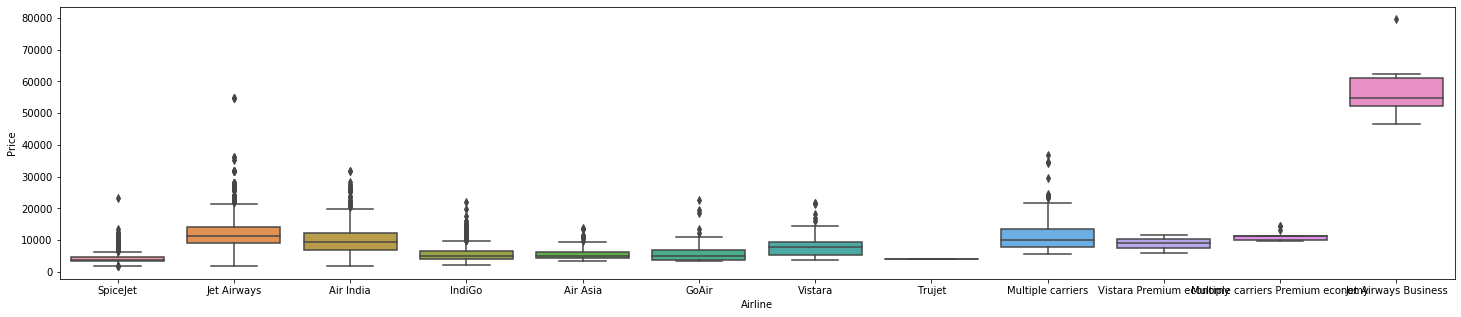

In [33]:
##Lets compare the Airlines with their prices==> best idea is to plot istribution plot
import seaborn as sns
#9248017168
plt.figure(figsize=(25,5))
sns.boxplot(x='Airline', y='Price', data=train_df.sort_values(('Price'), ascending=True))

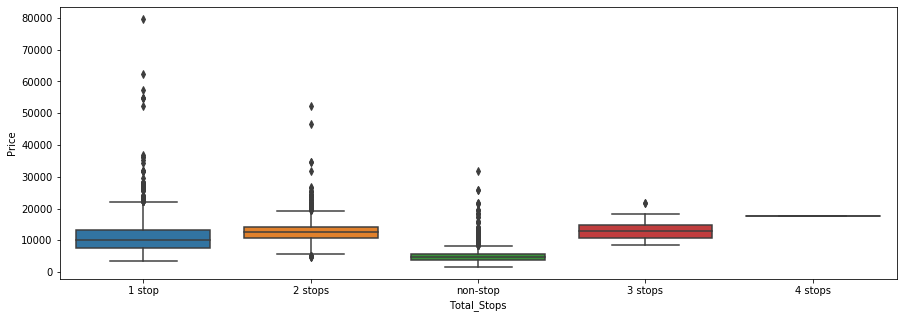

In [34]:
###lets check w.r.t to stopages
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops', y='Price', data=train_df.sort_values(('Price'), ascending=False))

In [35]:
###From boxplot we can see the price of fight with 1 stop is more fluctuating and is highest price(from outliers)
### and the price of flight with 4 stops is constant

In [36]:
##Airlines is a  nominal data and we need to perform Onehot encoding==> get_dummies function from pandas module

Airline=pd.get_dummies(cat_data['Airline'], drop_first=True) ##drop_first=true removes repetations
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [37]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

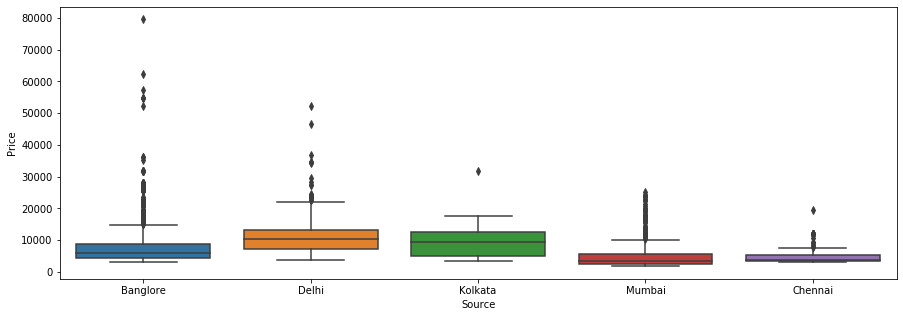

In [38]:
###distribution of source w.r.t to price

plt.figure(figsize=(15,5))
sns.boxplot(x='Source', y='Price', data=train_df.sort_values(('Price'), ascending=False))

In [39]:
Source=pd.get_dummies(train_df['Source'], drop_first=True)

In [40]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [41]:
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

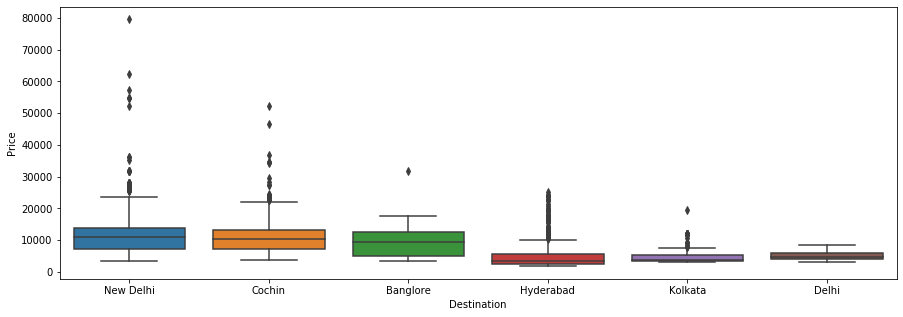

In [42]:
###distribution vs price
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination', y='Price', data=train_df.sort_values(('Price'), ascending=False))

In [43]:
Destination=pd.get_dummies(train_df['Destination'],drop_first=True)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [44]:
###Dealing with rdinal data==> label encoder
##ML cannot understand Route data so convert it into numbers
##Step1: Remove arrow
#step2: convert the column to list
Route_list=list(cat_data['Route'])


In [45]:
cat_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → JAI → DEL → HYD       1
BOM → NDC → HYD             1
CCU → IXB → DEL → BLR       1
CCU → RPR → HYD → BLR       1
BOM → JLR → HYD             1
Name: Route, Length: 128, dtype: int64

In [46]:
cat_data['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [47]:
cat_data['Route1']=cat_data['Route'].str.split('→').str[0]
cat_data['Route2']=cat_data['Route'].str.split('→').str[1]
cat_data['Route3']=cat_data['Route'].str.split('→').str[2]
cat_data['Route4']=cat_data['Route'].str.split('→').str[3]
cat_data['Route5']=cat_data['Route'].str.split('→').str[4]

C:\Users\Madhuri Ojha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Madhuri Ojha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Madhuri Ojha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [48]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [49]:
cat_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [50]:
###check nan values in Route of cat_data
cat_data.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [51]:
###Route3,4,5 have more nan values so lets fill Nan to None to avoid null values
cat_data['Route3'].fillna('None')

0         None
1         BBI 
2         BOM 
3          BLR
4          DEL
         ...  
10678     None
10679     None
10680     None
10681     None
10682     BOM 
Name: Route3, Length: 10682, dtype: object

In [52]:
for i in ['Route3','Route4','Route5']:
    cat_data[i].fillna('None',inplace=True)

C:\Users\Madhuri Ojha\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [53]:
cat_data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [54]:
##Print the diffrent categories in diffrent columns of cat_data
for i in cat_data.columns:
    print('{} have {} categories'.format(i, len(cat_data[i].value_counts())))

Airline have 12 categories
Source have 5 categories
Destination have 6 categories
Route have 128 categories
Total_Stops have 5 categories
Additional_Info have 10 categories
Route1 have 5 categories
Route2 have 45 categories
Route3 have 30 categories
Route4 have 14 categories
Route5 have 6 categories


In [55]:
##Route 2 and 3 have more number of categories and if we perform onehot encoding (get_dummies) will result in more 
##number of columns and results in complexity in using ML algos. So we will use Label encoder.

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [57]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    cat_data[i]=encoder.fit_transform(cat_data[i])

C:\Users\Madhuri Ojha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
cat_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [59]:
##Now remove the Route column
cat_data.drop('Route',axis=1,inplace=True)

C:\Users\Madhuri Ojha\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
cat_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [61]:
####Now we are left with Total_Stops and Additional_Info
cat_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [62]:
##As most of the data in Additional_Info is Noinfo ==> Remove the column
cat_data.drop('Additional_Info',axis=1,inplace=True)

In [63]:
cat_data.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [64]:
##Let's work on Total_Stops
cat_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [65]:
cat_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [66]:
##lets use dictionaries for Total_Stops
DICT={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
###Use map for dictionaries
cat_data['Total_Stops']=cat_data['Total_Stops'].map(DICT)
cat_data.head()

C:\Users\Madhuri Ojha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [67]:
### Until here we converted all the data into integers so lets combines all the data using concatination
data_train=pd.concat([train_df[num_col],cat_data,Airline,Source,Destination],axis=1)
data_train.head()

,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,7662,5,1,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,13882,6,9,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,6218,5,12,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,13302,3,1,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [68]:
data_train.columns

Index(['Price', 'Journey_Date', 'Journey_Month', 'Journey_Year',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minute', 'Airline',
       'Source', 'Destination', 'Total_Stops', 'Route1', 'Route2', 'Route3',
       'Route4', 'Route5', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [69]:
data_train.drop(['Airline','Source', 'Destination'],axis=1,inplace=True)

In [70]:
data_train.head()

,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,7662,5,1,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,13882,6,9,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,6218,5,12,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,13302,3,1,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [71]:
##To display all the columns
pd.set_option('display.max_columns',36)
data_train.head()

,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,2019,22,20,1,10,2,50,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7662,5,1,2019,5,50,13,15,7,25,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13882,6,9,2019,9,25,4,25,19,0,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,6218,5,12,2019,18,5,23,30,5,25,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,13302,3,1,2019,16,50,21,35,4,45,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Handling Outliers

In [72]:
##Outlier detection and imputation
##FOR OUTLIERS, USE DISTRIBUTION PLOT AND BOXPLOT

In [73]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

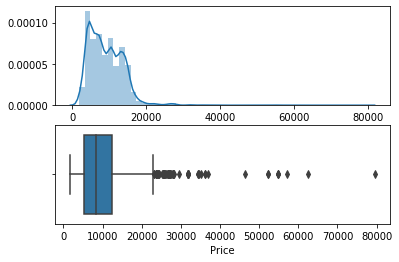

In [74]:
plot(data_train,'Price')

In [75]:
##From the plots and based on domain expert let's say data> 40000 are outliers.
##So the outliers (price >40000)will be replaced with median and the rest will be same.

#np.where(condition, True-operation, false-operation)

data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])


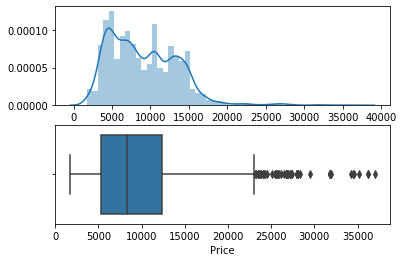

In [76]:
##Lets check the plot after outlier imputation
plot(data_train,'Price')

### Seperate independent and dependent features
Feature slection

In [77]:
X=data_train.drop('Price',axis=1)
X.head()

,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,24,3,2019,22,20,1,10,2,50,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,1,2019,5,50,13,15,7,25,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6,9,2019,9,25,4,25,19,0,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,5,12,2019,18,5,23,30,5,25,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,1,2019,16,50,21,35,4,45,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [78]:
X.shape

(10682, 35)

In [79]:
y=data_train['Price']

In [80]:
from sklearn.feature_selection import mutual_info_classif

In [81]:
mutual_info_classif(X,y)

array([1.06850371, 0.88094335, 1.46523473, 1.41543845, 1.19258929,
       1.83187539, 1.51465811, 1.7786497 , 1.07816074, 2.152308  ,
       2.02376752, 2.80998121, 2.2909749 , 1.45762111, 0.74174709,
       0.7663965 , 0.08924095, 0.66533762, 0.93257055, 0.01177047,
       0.57618871, 0.00908884, 0.31472859, 0.00610988, 0.22305893,
       0.0109121 , 0.17438259, 1.50115986, 0.87938601, 0.2908581 ,
       1.52472051, 0.39037314, 0.29689441, 0.17571335, 0.37954045])

In [82]:
Imp_corr=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
Imp_corr

,0
Journey_Date,1.072855
Journey_Month,0.864342
Journey_Year,1.430018
Dep_Time_hour,1.428352
Dep_Time_minute,1.223708
Arrival_Time_hour,1.845110
Arrival_Time_minute,1.566437
Duration_hour,1.788348
Duration_minute,1.090682
Total_Stops,2.192704


In [83]:
Imp_corr.columns=['Importance']
Imp_corr

,Importance
Journey_Date,1.072855
Journey_Month,0.864342
Journey_Year,1.430018
Dep_Time_hour,1.428352
Dep_Time_minute,1.223708
Arrival_Time_hour,1.845110
Arrival_Time_minute,1.566437
Duration_hour,1.788348
Duration_minute,1.090682
Total_Stops,2.192704


In [84]:

## Sort the column of importance in ascending order
Imp_corr.sort_values('Importance',ascending=True)

,Importance
Vistara Premium economy,0.000000
Trujet,0.000000
Jet Airways Business,0.000000
Multiple carriers Premium economy,0.010230
GoAir,0.090929
Chennai,0.166534
Kolkata,0.171430
Vistara,0.221794
Mumbai,0.278642
Hyderabad,0.307482


### Applying ML on the data and Automate the predictions

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [86]:
from sklearn import metrics

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
def model_predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print("Training score:", model.score(X_train,y_train))
    y_predict=model.predict(X_test)
    
    r2_score=metrics.r2_score(y_test,y_predict)
    MAE=metrics.mean_absolute_error(y_test,y_predict)
    MSE=metrics.mean_squared_error(y_test,y_predict)
    RMSE=np.sqrt(MSE)
    print('r2_score :',r2_score)
    print('MAE :',MAE)
    print('MSE :',MSE)
    print('RMSE:',RMSE)
    print('\n')
    
    sns.distplot(y_test-y_predict)

C:\Users\Madhuri Ojha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training score: 0.9473985700262241
r2_score : 0.8117565058541971
MAE : 1189.2062834711173
MSE : 3600934.814373359
RMSE: 1897.612925328387




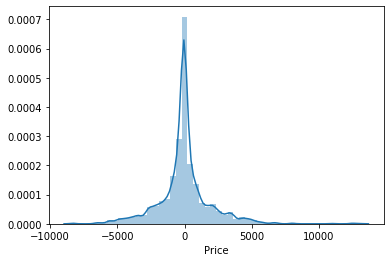

In [89]:
model_predict(RandomForestRegressor())

### Applying different models

### Dumping the model

In [90]:
##dump the model into a file only when dump=1

def model_predict(ml_model,dump):
    import pickle
    model=ml_model.fit(X_train,y_train)
    print("Training score:", model.score(X_train,y_train))
    y_predict=model.predict(X_test)
    
    r2_score=metrics.r2_score(y_test,y_predict)
    MAE=metrics.mean_absolute_error(y_test,y_predict)
    MSE=metrics.mean_squared_error(y_test,y_predict)
    RMSE=np.sqrt(MSE)
    print('r2_score :',r2_score)
    print('MAE :',MAE)
    print('MSE :',MSE)
    print('RMSE:',RMSE)
    print('\n')
    
    sns.distplot(y_test-y_predict)
    
    ##dump when it is specified ie., dump=1
    if dump==1:
        file=open('F:\Suchitra_Personal\python_Projects_Datascience\Airlines_Fare_Usecase/model.pkl','wb')
        pickle.dump(model,file)
        

In [91]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\Madhuri Ojha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training score: 0.9456027457508
r2_score : 0.8145761844844644
MAE : 1184.8582143414221
MSE : 3546996.807160158
RMSE: 1883.3472348879689




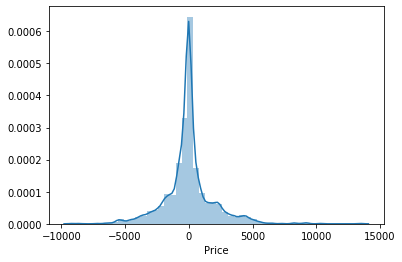

In [92]:
model_predict(RandomForestRegressor(),1)

In [93]:
### Different algorithms testing

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

Training score: 0.5122231792469654
r2_score : 0.512942947360793
MAE : 2241.0650444548432
MSE : 9316979.082826393
RMSE: 3052.3726972351187




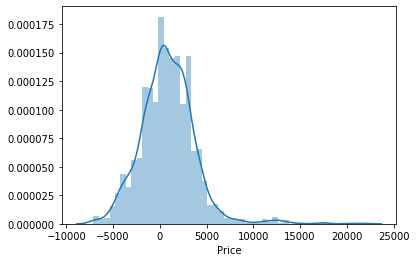

In [95]:
model_predict(LinearRegression(),0)

Training score: 0.9676967740373501
r2_score : 0.7312029986838943
MAE : 1304.8908360630166
MSE : 5141853.557438907
RMSE: 2267.565557473236




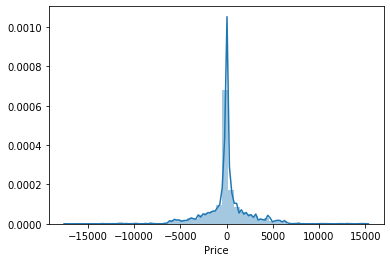

In [96]:
model_predict(DecisionTreeRegressor(),0)

Training score: 0.7774544946133906
r2_score : 0.6516899494000865
MAE : 1714.1445952269537
MSE : 6662869.243331773
RMSE: 2581.253424856183




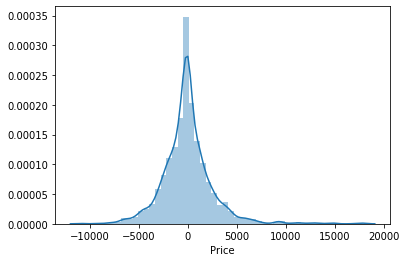

In [97]:
model_predict(KNeighborsRegressor(),0)

In [98]:
KNeighborsRegressor

sklearn.neighbors.regression.KNeighborsRegressor

### Hyper-parameter tuning 

In [101]:
from sklearn.model_selection import RandomizedSearchCV


TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_distributions'

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()

In [109]:
n_estimators= [int(x) for x in np.linspace(100,1200,num=6)]    ##No. of decision trees
#max_features  # No. of features to be considered for every split
max_depth=[int(x) for x in np.linspace(5,30,num=4)]   

In [110]:
###Parameters
random_grid={'n_estimators':n_estimators,
            'max_features': ['auto','sqrt'],
            'max_depth': max_depth,
            'min_samples_split':[5,10,15,100]}

In [112]:
rf_random=RandomizedSearchCV(estimator=rf_reg,param_distributions= random_grid, cv=5, verbose=2, n_jobs=-1)
##To this we need to pass a model, parameters and cv
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [113]:
###Best parameters
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [114]:
###Predict the test data
predictions=rf_random.predict(X_test)

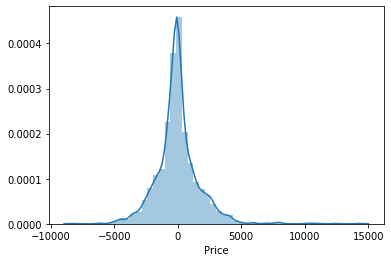

In [115]:
sns.distplot(y_test-predictions)

In [116]:
metrics.r2_score(y_test,predictions)

0.8499540758026829

In [117]:
##saving the file
file=open('F:\Suchitra_Personal\python_Projects_Datascience\Airlines_Fare_Usecase/rf_random.pkl','wb')

In [119]:
import pickle
pickle.dump(rf_random,file)

### Load the saved file

In [125]:
model_file=open('F:\Suchitra_Personal\python_Projects_Datascience\Airlines_Fare_Usecase/model.pkl','rb')
forest_model=pickle.load(model_file)
forest_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [127]:
##How predict the y values
predictions_beforetuning=forest_model.predict(X_test)
predictions_beforetuning

array([ 5754.2 ,  8241.8 ,  6710.8 , ...,  3936.7 ,  6496.3 , 11982.72])

In [128]:
metrics.r2_score(y_test,predictions_beforetuning)

0.8145761844844644

In [ ]:
##The accuracy of the mode before tuning is less than the model with tunned parameters.